# Introduction to deep learning for computer vision

**Reading in training, validation, test datasets**

* Step 1: Download the compressed dataset
cats_vs_dogs_small.zip from Canvas. Note: this is a slightly different dataset as the book as it contains 2000 pictures for training, 1000 for validation and 1000 (as opposed to 2000) for testing.

* Step 2: Unzip the file onto your local drive.

* Step 3: Upload your unzipped files (all folders and files) to your Google Drive

Instructions: log into your Google Drive using the same google account of your Google Colab. Find the "Colab Notebooks" folder. Drag the cats_vs_dogs_small folder into the "Colab Notebooks" folder. This should upload all subfolders and pictures onto your Google Drive.

* Step 4: mount your Google Drive within Colab using the following code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Step 5: find the path of your datafiles in Google Drive. On the left panel of Colab, Click File -> click folder content -> drive -> ...

For example, my path would look like something in the following: "/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small"

Then you can set the path to your files with the following code:

In [ ]:
import os, shutil, pathlib

new_base_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
print(new_base_dir)

/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small


**Question 1:	Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (half the sample size as the sample Jupyter notebook on Canvas). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?**

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train1/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train1/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train1/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train1/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train1/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train1/test/dogs


### Building the model

# **Model 1**

**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a `Dataset`**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.4895 - loss: 0.7186 - val_accuracy: 0.5380 - val_loss: 0.6897
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.5516 - loss: 0.7003 - val_accuracy: 0.5910 - val_loss: 0.6929
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.5446 - loss: 0.7099 - val_accuracy: 0.5420 - val_loss: 0.6777
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.6215 - loss: 0.6730 - val_accuracy: 0.6200 - val_loss: 0.6380
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.6333 - loss: 0.6445 - val_accuracy: 0.5980 - val_loss: 0.6688
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.6508 - loss: 0.6506 - val_accuracy: 0.6440 - val_loss: 0.6541
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.6707 - loss: 0.6188 - val_accuracy: 0.6810 - val_loss: 0.5796
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.7043 - loss: 0.5569 - val_accura

**Displaying curves of loss and accuracy during training**

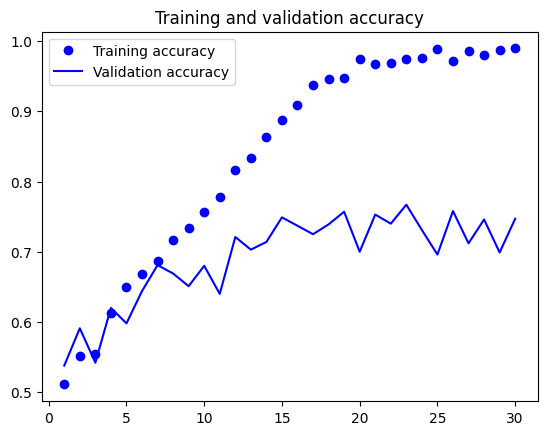

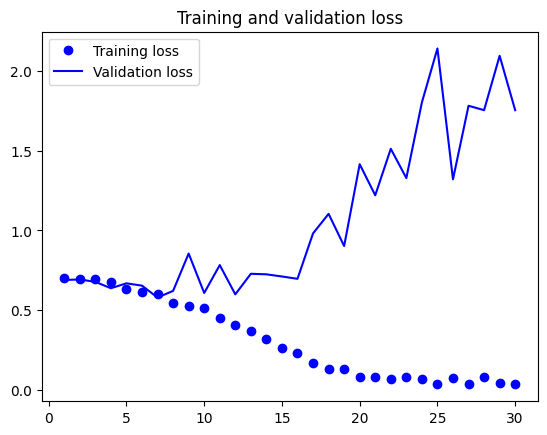

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.6734 - loss: 0.5994
Test accuracy: 0.679
Test loss: 0.594


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.6748 - loss: 0.5875
Validation accuracy: 0.681
Validation loss: 0.580


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

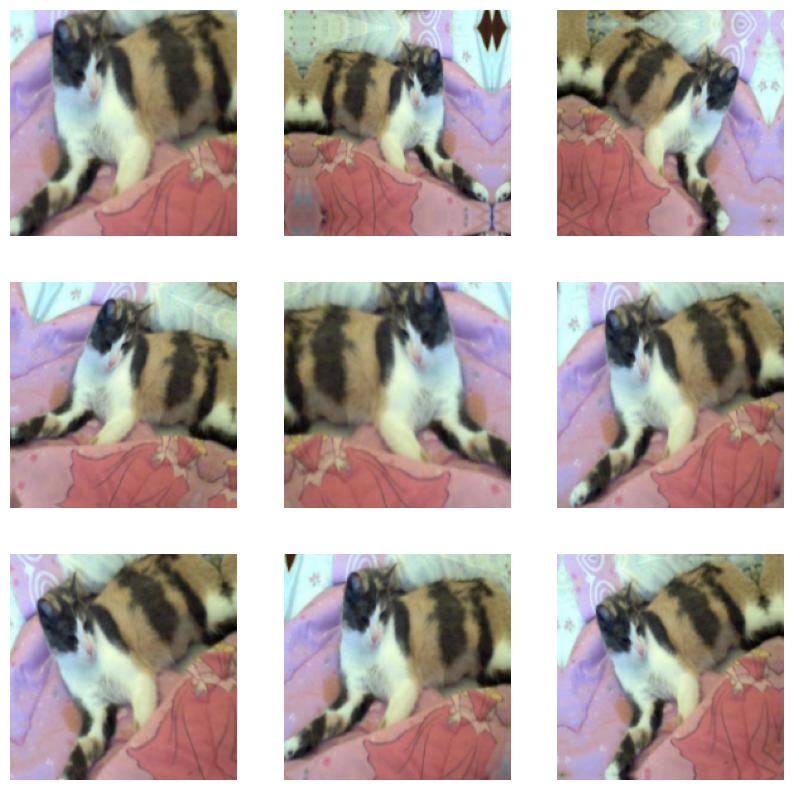

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.5077 - loss: 0.7373 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 166ms/step - accuracy: 0.4875 - loss: 0.6959 - val_accuracy: 0.5000 - val_loss: 0.7435
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.4912 - loss: 0.7001 - val_accuracy: 0.5000 - val_loss: 0.7024
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.5479 - loss: 0.7060 - val_accuracy: 0.5150 - val_loss: 0.6879
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.5585 - loss: 0.6816 - val_accuracy: 0.6240 - val_loss: 0.6519
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.6128 - loss: 0.6512 - val_accuracy: 0.6520 - val_loss: 0.6332
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.6446 - loss: 0.6303 - val_accuracy: 0.6730 - val_loss: 0.5906
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.6360 - loss: 0.6223 - 

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.8109 - loss: 0.4688
Test accuracy: 0.806
Test loss: 0.477


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.8232 - loss: 0.4160
Validation accuracy: 0.830
Validation loss: 0.407


**Question 2 :Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve?**


### **Model 2**

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=700)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train2/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train2/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train2/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train2/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train2/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train2/test/dogs


**Instantiating the VGG16 convolutional base**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1400 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.5275 - loss: 0.8202 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.5077 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5346 - loss: 0.7043 - val_accuracy: 0.5640 - val_loss: 0.6737
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6018 - loss: 0.6724 - val_accuracy: 0.6380 - val_loss: 0.6123
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6238 - loss: 0.6690 - val_accuracy: 0.6480 - val_loss: 0.6300
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6706 - loss: 0.5974 - val_accuracy: 0.5880 - val_loss: 0.6530
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6721 - loss: 0.6267 - val_accuracy: 0.7000 - val_loss: 0.5868
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7392 - loss: 0.5461 - val_accuracy: 0.6400 -

**Displaying curves of loss and accuracy during training**

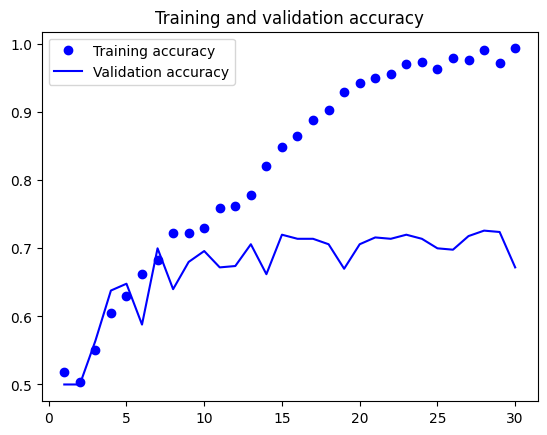

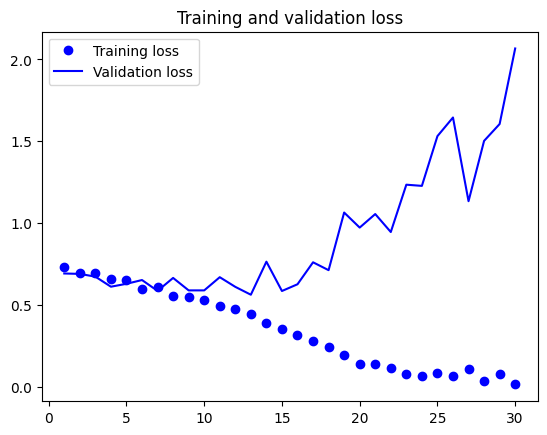

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7190 - loss: 0.5886
Test accuracy: 0.704
Test loss: 0.614


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7138 - loss: 0.5698
Validation accuracy: 0.706
Validation loss: 0.563


# **Using data augmentation**
**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

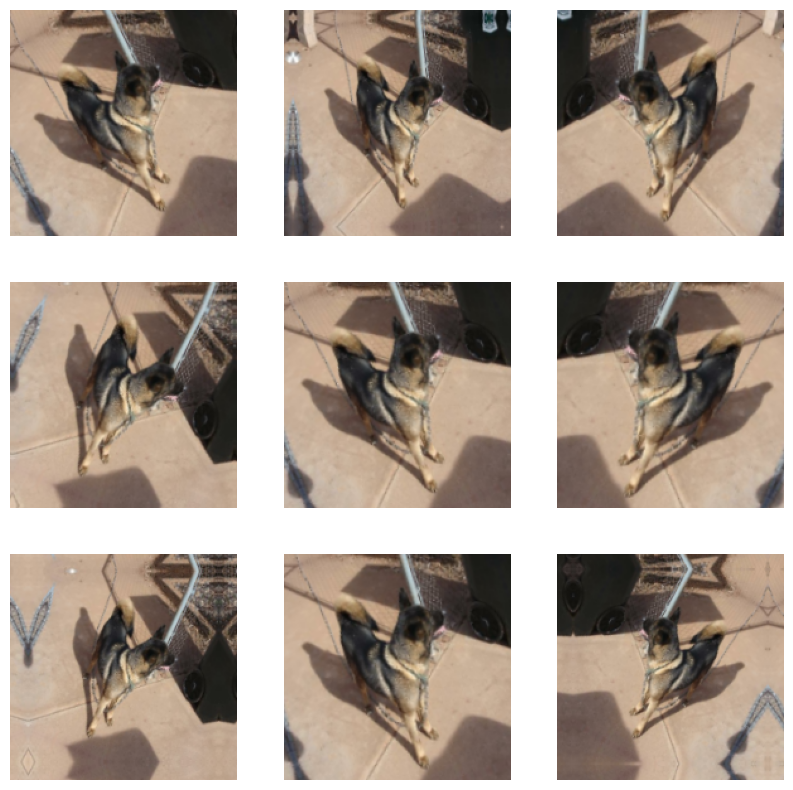

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5233 - loss: 0.9347 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5059 - loss: 0.6944 - val_accuracy: 0.5720 - val_loss: 0.6924
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5343 - loss: 0.6927 - val_accuracy: 0.5020 - val_loss: 0.6915
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5074 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.7028
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5472 - loss: 0.6950 - val_accuracy: 0.5040 - val_loss: 0.7083
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.5791 - loss: 0.6860 - val_accuracy: 0.6460 - val_loss: 0.6608
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6081 - loss: 0.6630 - val_accuracy: 0.6060 - val_loss: 0.6695
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6063 - loss: 0.6725 - val_accuracy: 0.5960 - v

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7648 - loss: 0.4971
Test accuracy: 0.756
Test loss: 0.524


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7880 - loss: 0.4422
Validation accuracy: 0.788
Validation loss: 0.465


**Question 3: Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.**

# Model 3

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 3000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=800)
make_subset("validation", start_index=1200, end_index=1450)
make_subset("test", start_index=1700, end_index=1950)


Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train3/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train3/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train3/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train3/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train3/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train3/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Using image_dataset_from_directory to read images

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1600 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.5067 - loss: 0.7688 - val_accuracy: 0.5560 - val_loss: 0.6929
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5307 - loss: 0.6947 - val_accuracy: 0.4980 - val_loss: 0.6915
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.5342 - loss: 0.6939 - val_accuracy: 0.5260 - val_loss: 0.6877
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5723 - loss: 0.6783 - val_accuracy: 0.6100 - val_loss: 0.6554
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6235 - loss: 0.6566 - val_accuracy: 0.6560 - val_loss: 0.6400
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6430 - loss: 0.6453 - val_accuracy: 0.6780 - val_loss: 0.6219
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6842 - loss: 0.5915 - val_accuracy: 0.6780 - val_loss: 0.5957
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7162 - loss: 0.5672 - val_accuracy: 0.6120 - v

**Displaying curves of loss and accuracy during training**

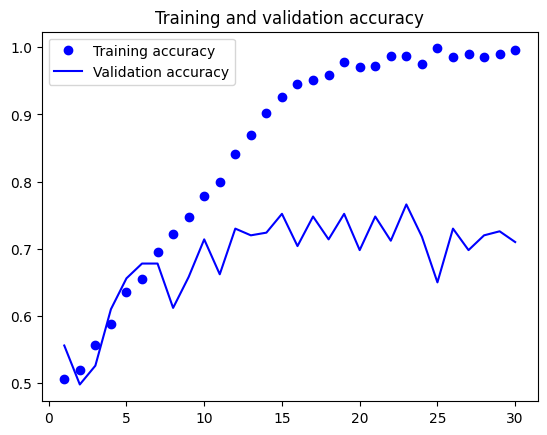

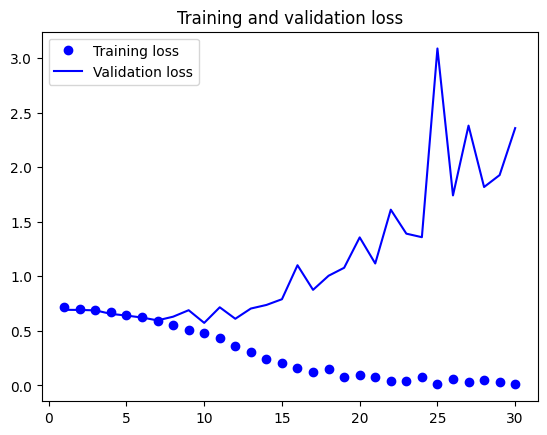

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6859 - loss: 0.5906
Test accuracy: 0.700
Test loss: 0.579


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7182 - loss: 0.5751
Validation accuracy: 0.714
Validation loss: 0.573


# **Using data augmentation**

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

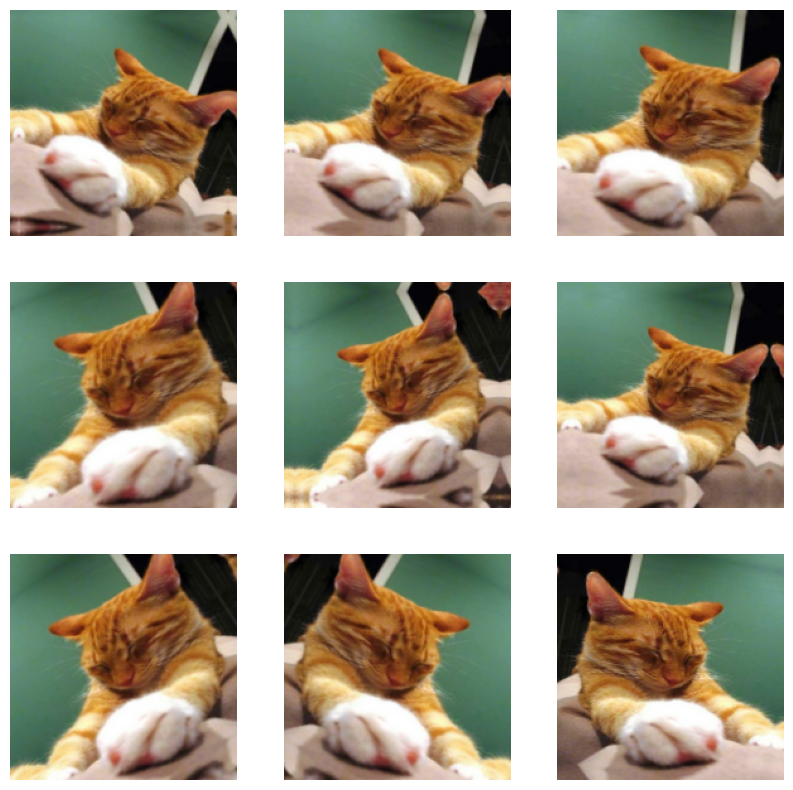

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Defining a new convnet that includes image augmentation and dropout

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.4974 - loss: 0.7099 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5191 - loss: 0.6988 - val_accuracy: 0.5000 - val_loss: 0.6913
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5271 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.7360
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5090 - loss: 0.7021 - val_accuracy: 0.5480 - val_loss: 0.6842
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5932 - loss: 0.6858 - val_accuracy: 0.6580 - val_loss: 0.6560
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6042 - loss: 0.6703 - val_accuracy: 0.6280 - val_loss: 0.6575
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5911 - loss: 0.6608 - val_accuracy: 0.6640 - val_loss: 0.6450
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6531 - loss: 0.6438 - val_accuracy: 0.6480 - v

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7754 - loss: 0.4768
Test accuracy: 0.790
Test loss: 0.485


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8092 - loss: 0.4202
Validation accuracy: 0.820
Validation loss: 0.416


# Model 4

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train4")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 2500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=900)
make_subset("validation", start_index=1250, end_index=1500)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train4/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train4/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train4/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train4/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train4/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train4/test/dogs


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1800 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.5080 - loss: 0.7476 - val_accuracy: 0.5000 - val_loss: 0.6977
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5155 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5590 - loss: 0.6943 - val_accuracy: 0.5700 - val_loss: 0.6641
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5979 - loss: 0.6531 - val_accuracy: 0.5000 - val_loss: 0.8194
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6662 - loss: 0.6091 - val_accuracy: 0.6080 - val_loss: 0.6681
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6995 - loss: 0.5890 - val_accuracy: 0.6020 - val_loss: 0.7528
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7050 - loss: 0.5550 - val_accuracy: 0.6740 - val_loss: 0.5926
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.7230 - loss: 0.5338 - val_accuracy: 0.6860 -

**Displaying curves of loss and accuracy during training**

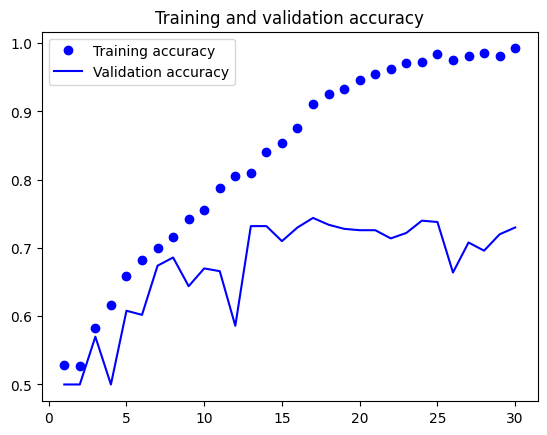

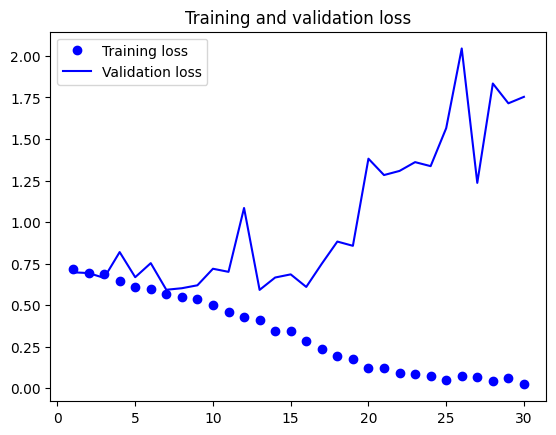

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7072 - loss: 0.6270
Test accuracy: 0.708
Test loss: 0.644


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7422 - loss: 0.5997
Validation accuracy: 0.732
Validation loss: 0.592


# Using data augmentation
**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

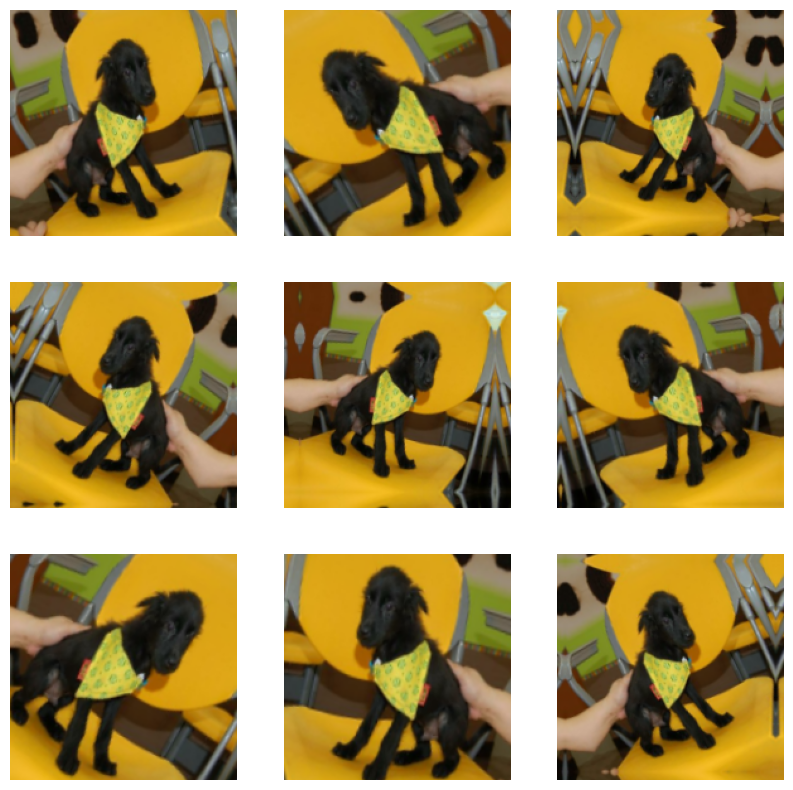

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5053 - loss: 0.7871 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5009 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5321 - loss: 0.6979 - val_accuracy: 0.6320 - val_loss: 0.6807
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5808 - loss: 0.6829 - val_accuracy: 0.5580 - val_loss: 0.6782
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6150 - loss: 0.6615 - val_accuracy: 0.6160 - val_loss: 0.6391
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.6505 - loss: 0.6212 - val_accuracy: 0.4960 - val_loss: 1.5129
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6362 - loss: 0.6709 - val_accuracy: 0.5320 - val_loss: 0.7388
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6539 - loss: 0.6250 - val_accuracy: 0.6680 - v

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7603 - loss: 0.4672
Test accuracy: 0.780
Test loss: 0.450


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7685 - loss: 0.4941
Validation accuracy: 0.772
Validation loss: 0.494


# Model 5

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train5")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train5/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train5/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train5/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train5/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train5/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train5/test/dogs


Instantiating a small convnet for dogs vs. cats classification

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_8 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Using image_dataset_from_directory to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Displaying the shapes of the data and labels yielded by the Dataset

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.5174 - loss: 0.7156 - val_accuracy: 0.5040 - val_loss: 0.6899
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5541 - loss: 0.6888 - val_accuracy: 0.6480 - val_loss: 0.6776
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5816 - loss: 0.6780 - val_accuracy: 0.6380 - val_loss: 0.6423
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6269 - loss: 0.6603 - val_accuracy: 0.6300 - val_loss: 0.6524
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.6474 - loss: 0.6252 - val_accuracy: 0.6540 - val_loss: 0.6711
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.6784 - loss: 0.5937 - val_accuracy: 0.6240 - val_loss: 0.7897
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7031 - loss: 0.5753 - val_accuracy: 0.6700 - val_loss: 0.6313
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7396 - loss: 0.5293 - val_accuracy: 0.6580 - v

Displaying curves of loss and accuracy during training

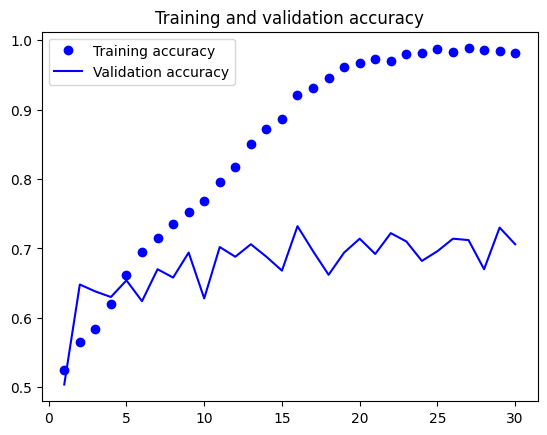

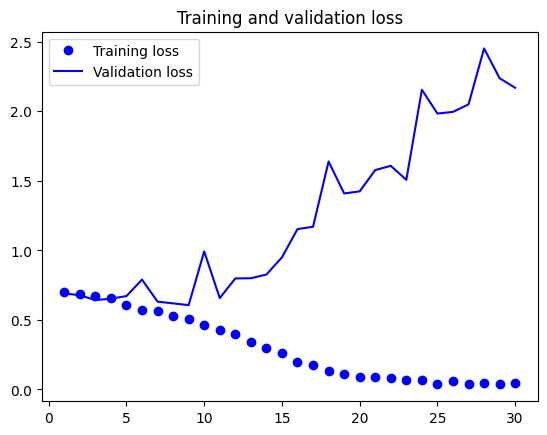

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6865 - loss: 0.6213
Test accuracy: 0.694
Test loss: 0.612


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6809 - loss: 0.6102
Validation accuracy: 0.694
Validation loss: 0.606


# Using data augmentation
**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

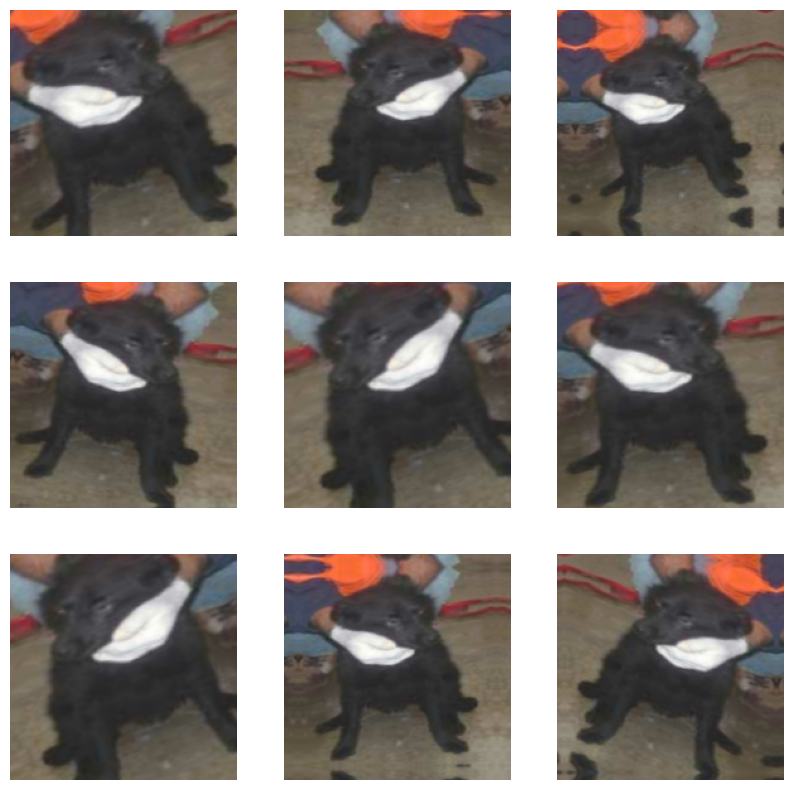

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5080 - loss: 0.7177 - val_accuracy: 0.5080 - val_loss: 0.6916
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5187 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5668 - loss: 0.6900 - val_accuracy: 0.5260 - val_loss: 0.6820
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5710 - loss: 0.6816 - val_accuracy: 0.5020 - val_loss: 0.7530
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6387 - loss: 0.6494 - val_accuracy: 0.6620 - val_loss: 0.6270
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.6610 - loss: 0.6305 - val_accuracy: 0.6540 - val_loss: 0.6013
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6588 - loss: 0.6138 - val_accuracy: 0.5660 - val_loss: 0.7902
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.6647 - loss: 0.6090 - val_accuracy: 0.6720 - v

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8077 - loss: 0.4788
Test accuracy: 0.806
Test loss: 0.467


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8339 - loss: 0.3677
Validation accuracy: 0.840
Validation loss: 0.381


**Question 4: Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.**

**Leveraging a pretrained model**

# Model 6
**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train1/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train1/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train1/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train1/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train1/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train1/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 242ms/step - accuracy: 0.7906 - loss: 50.7884 - val_accuracy: 0.9340 - val_loss: 7.1355
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9279 - loss: 11.0387 - val_accuracy: 0.9400 - val_loss: 10.0305
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9529 - loss: 7.9259 - val_accuracy: 0.9780 - val_loss: 5.0105
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.9714 - loss: 2.9470 - val_accuracy: 0.9760 - val_loss: 5.1521
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.9665 - loss: 3.2726 - val_accuracy: 0.9760 - val_loss: 5.4119
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.9795 - loss: 1.7682 - val_accuracy: 0.9780 - val_loss: 5.7605
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.9623 - loss: 4.5877 - val_accuracy: 0.9740 - val_loss: 7.8859
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9808 - loss: 2.5519 - val_accuracy

Evaluating the model on the test set

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9786 - loss: 7.2074
Test accuracy: 0.972
Test loss: 9.451


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9763 - loss: 2.9428
Validation accuracy: 0.976
Validation loss: 3.672


# Model 7

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base **

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=700)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train2/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train2/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train2/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train2/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train2/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train2/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1400 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

Printing the list of trainable weights before and after freezing

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


Adding a data augmentation stage and a classifier to the convolutional base

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.7784 - loss: 44.3585 - val_accuracy: 0.8460 - val_loss: 41.1619
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.9328 - loss: 10.0626 - val_accuracy: 0.9700 - val_loss: 2.5050
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.9432 - loss: 7.2109 - val_accuracy: 0.9520 - val_loss: 7.5326
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.9569 - loss: 6.8058 - val_accuracy: 0.9780 - val_loss: 3.6899
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.9679 - loss: 3.1976 - val_accuracy: 0.9820 - val_loss: 1.3683
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.9754 - loss: 3.0154 - val_accuracy: 0.9580 - val_loss: 7.6918
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.9738 - loss: 1.8130 - val_accuracy: 0.9680 - val_loss: 5.6106
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.9744 - loss: 2.9633 - val_accurac

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9816 - loss: 2.4093
Test accuracy: 0.968
Test loss: 4.955


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9811 - loss: 0.9699
Validation accuracy: 0.982
Validation loss: 1.368


# Model 8

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
#Training has 3000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=800)
make_subset("validation", start_index=1200, end_index=1450)
make_subset("test", start_index=1700, end_index=1950)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train3/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train3/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train3/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train3/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train3/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train3/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1600 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

Printing the list of trainable weights before and after freezing

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.8340 - loss: 35.1441 - val_accuracy: 0.9680 - val_loss: 3.1758
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9382 - loss: 6.8582 - val_accuracy: 0.9740 - val_loss: 4.3285
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.9562 - loss: 5.2253 - val_accuracy: 0.9700 - val_loss: 4.4922
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9679 - loss: 3.8107 - val_accuracy: 0.9520 - val_loss: 6.6081
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.9627 - loss: 4.4358 - val_accuracy: 0.9800 - val_loss: 3.3153
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.9718 - loss: 4.4889 - val_accuracy: 0.9680 - val_loss: 3.9277
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.9699 - loss: 3.6294 - val_accuracy: 0.9740 - val_loss: 2.1459
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9800 - loss: 2.0349 - val_accuracy: 0

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9739 - loss: 3.8546
Test accuracy: 0.970
Test loss: 4.993


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9879 - loss: 1.3222
Validation accuracy: 0.974
Validation loss: 2.146


# Model 9

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train4")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category
        dst_dir = new_base_dir / subset_name / category

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

make_subset("train", start_index=0, end_index=900)
make_subset("validation", start_index=1250, end_index=1500)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train4/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train4/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train4/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train4/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train4/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train4/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1800 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.8387 - loss: 38.7179 - val_accuracy: 0.9680 - val_loss: 5.2346
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.9461 - loss: 6.5744 - val_accuracy: 0.9580 - val_loss: 8.5484
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9458 - loss: 7.3006 - val_accuracy: 0.9680 - val_loss: 3.4541
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9520 - loss: 5.1423 - val_accuracy: 0.9620 - val_loss: 3.7933
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9653 - loss: 4.9253 - val_accuracy: 0.9720 - val_loss: 4.2972
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.9652 - loss: 3.7002 - val_accuracy: 0.9740 - val_loss: 5.3767
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.9753 - loss: 3.1400 - val_accuracy: 0.9720 - val_loss: 3.7934
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.9687 - loss: 2.9393 - val_accuracy: 0

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9746 - loss: 2.4866
Test accuracy: 0.970
Test loss: 3.039


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9908 - loss: 0.9491
Validation accuracy: 0.986
Validation loss: 1.377


# Model 10

**Feature extraction with a pretrained model**

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil
from pathlib import Path

# Define paths
original_data_dir = pathlib.Path("/content/drive/MyDrive/Advance Machine Learning/cats_vs_dogs_small/cats_vs_dogs_small")
new_base_dir = Path("cats_vs_dogs_small/train5")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        src_dir = original_data_dir /subset_name/ category  # Source directory
        dst_dir = new_base_dir / subset_name / category  # Destination directory

        print(f"Creating subset: {subset_name}, Category: {category}")
        print(f"Destination directory: {dst_dir}")

        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src_file = src_dir / fname
            dst_file = dst_dir / fname

            # Copy only if the source file exists
            if src_file.exists():
                shutil.copyfile(src_file, dst_file)
            else:
                print(f"Warning: Source file {src_file} not found.")

# Create subsets
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

Creating subset: train, Category: cats
Destination directory: cats_vs_dogs_small/train5/train/cats
Creating subset: train, Category: dogs
Destination directory: cats_vs_dogs_small/train5/train/dogs
Creating subset: validation, Category: cats
Destination directory: cats_vs_dogs_small/train5/validation/cats
Creating subset: validation, Category: dogs
Destination directory: cats_vs_dogs_small/train5/validation/dogs
Creating subset: test, Category: cats
Destination directory: cats_vs_dogs_small/train5/test/cats
Creating subset: test, Category: dogs
Destination directory: cats_vs_dogs_small/train5/test/dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - accuracy: 0.8100 - loss: 41.9249 - val_accuracy: 0.9560 - val_loss: 5.1216
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9425 - loss: 6.8141 - val_accuracy: 0.9880 - val_loss: 1.7891
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.9523 - loss: 5.7361 - val_accuracy: 0.9820 - val_loss: 0.7598
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.9556 - loss: 4.8163 - val_accuracy: 0.9800 - val_loss: 2.2282
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.9672 - loss: 5.1745 - val_accuracy: 0.9800 - val_loss: 3.1874
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.9662 - loss: 3.4233 - val_accuracy: 0.9820 - val_loss: 3.3007
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9765 - loss: 2.4282 - val_accuracy: 0.9720 - val_loss: 6.6154
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9568 - loss: 4.8605 - val_accuracy

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9859 - loss: 3.0901
Test accuracy: 0.980
Test loss: 3.826


In [ ]:
# Load the model with feature extraction and data augmentation
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9806 - loss: 0.6880
Validation accuracy: 0.982
Validation loss: 0.760


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

base_dir = "/content/cats_vs_dogs_small"

def load_sets(train_folder):
    train_dir = f"{base_dir}/{train_folder}/train"
    val_dir = f"{base_dir}/{train_folder}/validation"
    test_dir = f"{base_dir}/{train_folder}/test"

    train_ds = image_dataset_from_directory(train_dir, image_size=(180,180), batch_size=32)
    val_ds = image_dataset_from_directory(val_dir, image_size=(180,180), batch_size=32)
    test_ds = image_dataset_from_directory(test_dir, image_size=(180,180), batch_size=32)

    return train_ds, val_ds, test_ds

def build_pretrained_model():
    conv_base = keras.applications.VGG16(
        weights="imagenet",
        include_top=False,
        input_shape=(180,180,3)
    )
    conv_base.trainable = False

    inputs = keras.Input(shape=(180,180,3))
    x = layers.Rescaling(1./255)(inputs)
    x = conv_base(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

train_folders = ["train1", "train2", "train3", "train4",  "train5"]
results_pretrained = []

for folder in train_folders:
    print(f"\n🔵 PRETRAINED MODEL USING → {folder}")
    train_ds, val_ds, test_ds = load_sets(folder)
    model = build_pretrained_model()

    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    loss, acc = model.evaluate(test_ds)
    print(f"✅ Test Accuracy for {folder}: {acc:.4f}")
    results_pretrained.append((folder, acc))



🔵 PRETRAINED MODEL USING → train1
Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 281ms/step - accuracy: 0.5963 - loss: 2.5357 - val_accuracy: 0.5560 - val_loss: 1.0554
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - accuracy: 0.8152 - loss: 0.4414 - val_accuracy: 0.8980 - val_loss: 0.2651
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.8640 - loss: 0.3159 - val_accuracy: 0.9000 - val_loss: 0.2445
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.8510 - loss: 0.3245 - val_accuracy: 0.9180 - val_loss: 0.2135
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.9210 - loss: 0.2215 - val_accuracy: 0.7220 - val_loss: 0.8243
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.8825 - loss: 0.3175 - val_accuracy: 0.8860 - val_loss: 0.2826
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.8988 - lo